In [9]:
  
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '13088212-27fc-46eb-8307-45d2c0a7a8bd',
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)

{'status': {'timestamp': '2023-09-24T14:46:50.169Z', 'error_code': 0, 'error_message': None, 'elapsed': 613, 'credit_count': 1, 'notice': None, 'total_count': 9106}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10476, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [2]:
type(data)

dict

In [10]:
import pandas as pd
df = pd.json_normalize(data['data'])
df['timestamp']=pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10476,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.949476e+07,1.949476e+07,...,49.1639,5.584040e+11,None,2023-09-24T14:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 14:47:02.308584
1,1027,Ethereum,ETH,ethereum,7431,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202280e+08,1.202280e+08,...,18.1829,1.917185e+11,None,2023-09-24T14:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 14:47:02.308584
2,825,Tether USDt,USDT,tether,62740,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.320374e+10,8.642620e+10,...,7.8922,8.643843e+10,None,2023-09-24T14:44:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-24 14:47:02.308584
3,1839,BNB,BNB,bnb,1635,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538474e+08,1.538474e+08,...,3.0741,3.241347e+10,None,2023-09-24T14:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 14:47:02.308584
4,52,XRP,XRP,xrp,1097,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.324524e+10,9.998841e+10,...,2.5765,5.102071e+10,None,2023-09-24T14:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 14:47:02.308584
5,3408,USD Coin,USDC,usd-coin,14216,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.577544e+10,2.577544e+10,...,2.4449,2.577878e+10,None,2023-09-24T14:44:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-24 14:47:02.308584
6,74,Dogecoin,DOGE,dogecoin,800,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.411392e+11,1.411392e+11,...,0.8245,8.693170e+09,None,2023-09-24T14:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 14:47:02.308584
7,2010,Cardano,ADA,cardano,938,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.511837e+10,3.619858e+10,...,0.8174,1.104301e+10,None,2023-09-24T14:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 14:47:02.308584
8,5426,Solana,SOL,solana,530,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.127479e+08,5.582837e+08,...,0.7642,1.089866e+10,None,2023-09-24T14:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 14:47:02.308584
9,11419,Toncoin,TON,toncoin,150,2021-08-26T13:40:22.000Z,"[pos, ftx-bankruptcy-estate, dwf-labs-portfoli...",NaN,3.431892e+09,5.047559e+09,...,0.7227,1.120771e+10,None,2023-09-24T14:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 14:47:02.308584


In [23]:
def api_runner():
    global df
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
       'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '13088212-27fc-46eb-8307-45d2c0a7a8bd',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
    import pandas as pd
    df = pd.json_normalize(data['data'])
    df['timestamp']=pd.to_datetime('now')

    
    #OUTPUT to a csv file
    if not os.path.isfile(r'E:\Data Analytics\WebScraping\APIs\Coinmarketcap.csv'):
        df.to_csv(r'E:\Data Analytics\WebScraping\APIs\Coinmarketcap.csv',header='column_names')    
    else:
        df.to_csv(r'E:\Data Analytics\WebScraping\APIs\Coinmarketcap.csv',mode='a',header=False)    

In [24]:
import os
from time import time
from time import sleep
for i in range(333):
    api_runner()
    print('API Runner completed Successfully')
    sleep(60) #sleeps for 1 min
exit()
    


API Runner completed Successfully
API Runner completed Successfully
API Runner completed Successfully


KeyboardInterrupt: 

In [11]:
import pandas as pd
df4=pd.read_csv(r"E:\Data Analytics\WebScraping\APIs\Coinmarketcap.csv")
df4

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10476,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00,19494756.00,19494756.00,False,NaN,1,NaN,NaN,NaN,2023-09-24T15:38:00.000Z,26567.04,6284211076.56,-24.52,-0.09,0.03,0.03,2.28,-9.40,-12.75,517917900425.61,49.15,557907773194.89,NaN,2023-09-24T15:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 15:40:06.831528
1,1,1027,Ethereum,ETH,ethereum,7431,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120228044.09,120228044.09,True,NaN,2,NaN,NaN,NaN,2023-09-24T15:38:00.000Z,1589.83,2010015134.09,-21.00,-0.30,0.04,-2.49,-3.64,-14.57,-16.01,191141625304.55,18.14,191141625304.55,NaN,2023-09-24T15:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 15:40:06.831528
2,2,825,Tether USDt,USDT,tether,62741,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83203741768.41,86426198725.00,True,NaN,3,NaN,NaN,NaN,2023-09-24T15:38:00.000Z,1.00,10780601396.07,-19.57,-0.02,-0.01,-0.06,0.06,0.02,-0.00,83207463547.91,7.90,86430064647.95,NaN,2023-09-24T15:38:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-24 15:40:06.831528
3,3,1839,BNB,BNB,bnb,1635,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,153847379.73,153847379.73,False,NaN,4,NaN,NaN,NaN,2023-09-24T15:38:00.000Z,210.56,203960702.96,-10.17,-0.05,0.07,-2.79,-2.71,-11.67,-11.74,32393480109.33,3.07,32393480109.33,NaN,2023-09-24T15:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 15:40:06.831528
4,4,52,XRP,XRP,xrp,1097,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00,53245240268.00,99988414766.00,False,NaN,5,NaN,NaN,NaN,2023-09-24T15:38:00.000Z,0.51,356026000.44,-27.97,-0.21,0.05,1.96,-1.54,-27.72,5.21,27116053794.02,2.57,50926718815.68,NaN,2023-09-24T15:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 15:40:06.831528
5,5,3408,USD Coin,USDC,usd-coin,14216,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,25775441038.54,25775441038.54,False,NaN,6,NaN,NaN,NaN,2023-09-24T15:38:00.000Z,1.00,1430286869.94,-28.00,-0.02,-0.01,-0.03,0.00,-0.02,-0.01,25774894321.04,2.45,25774894321.04,NaN,2023-09-24T15:38:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-24 15:40:06.831528
6,6,74,Dogecoin,DOGE,dogecoin,800,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,141139176383.71,141139176383.71,True,NaN,7,NaN,NaN,NaN,2023-09-24T15:38:00.000Z,0.06,98644590.61,-18.76,-0.12,0.11,-0.99,-1.35,-22.18,-6.87,8681125516.30,0.82,8681125516.30,NaN,2023-09-24T15:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 15:40:06.831528
7,7,2010,Cardano,ADA,cardano,938,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00,35118371014.79,36198584811.42,False,NaN,8,NaN,NaN,NaN,2023-09-24T15:38:00.000Z,0.25,65729532.72,-26.70,-0.07,0.06,-2.10,-6.05,-19.58,-15.21,8610518091.74,0.82,11033351004.94,NaN,2023-09-24T15:38:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-24 15:40:06.831528
8,8,5426,Solana,SOL,solana,530,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,412747900.37,558283723.71,True,NaN,9,NaN,NaN,NaN,2023-09-24T15:38:00.000Z,19.47,96768355.39,-25.57,-0.32,0.70,2.39,-5.20,-21.63,15.58,8035406386.79,0.76,10868708466.

In [10]:
#format in a better option instead of scientific notation for circulating_supply
pd.set_option('display.float_format',lambda x: '%.2f' % x)
pd.set_option('display.max.columns',38)
pd.set_option('display.max.rows',200)


In [12]:
df5 =df4.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df5

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.08,0.03,0.04,2.26,-9.39,-12.75
Ethereum,-0.29,0.04,-2.47,-3.68,-14.55,-15.98
Tether USDt,-0.01,-0.01,-0.06,0.06,0.02,0.00
BNB,-0.06,0.07,-2.76,-2.75,-11.67,-11.78
XRP,-0.22,0.04,1.98,-1.57,-27.73,5.16
USD Coin,-0.01,-0.01,-0.03,-0.00,-0.01,0.00
Dogecoin,-0.14,0.11,-0.98,-1.38,-22.18,-6.91
Cardano,-0.09,0.05,-2.07,-6.08,-19.59,-15.24
Solana,-0.33,0.70,2.43,-5.20,-21.71,15.53


In [13]:
#change the columns into rows for easy visuals
df6=df5.stack()
df6

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.08
             quote.USD.percent_change_24h     0.03
             quote.USD.percent_change_7d      0.04
             quote.USD.percent_change_30d     2.26
             quote.USD.percent_change_60d    -9.39
             quote.USD.percent_change_90d   -12.75
Ethereum     quote.USD.percent_change_1h     -0.29
             quote.USD.percent_change_24h     0.04
             quote.USD.percent_change_7d     -2.47
             quote.USD.percent_change_30d    -3.68
             quote.USD.percent_change_60d   -14.55
             quote.USD.percent_change_90d   -15.98
Tether USDt  quote.USD.percent_change_1h     -0.01
             quote.USD.percent_change_24h    -0.01
             quote.USD.percent_change_7d     -0.06
             quote.USD.percent_change_30d     0.06
             quote.USD.percent_change_60d     0.02
             quote.USD.percent_change_90d     0.00
BNB          quote.USD.percent_change_1h

In [14]:
#since stacking caused it to be a series we convert it back to a df
df7 = df6.to_frame(name='values')
df8=df7.reset_index()
df8

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.08
1,Bitcoin,quote.USD.percent_change_24h,0.03
2,Bitcoin,quote.USD.percent_change_7d,0.04
3,Bitcoin,quote.USD.percent_change_30d,2.26
4,Bitcoin,quote.USD.percent_change_60d,-9.39
5,Bitcoin,quote.USD.percent_change_90d,-12.75
6,Ethereum,quote.USD.percent_change_1h,-0.29
7,Ethereum,quote.USD.percent_change_24h,0.04
8,Ethereum,quote.USD.percent_change_7d,-2.47
9,Ethereum,quote.USD.percent_change_30d,-3.68


In [15]:
df9 = df8.rename(columns={'level_1':'percentage_change'})
df9

,name,percentage_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.08
1,Bitcoin,quote.USD.percent_change_24h,0.03
2,Bitcoin,quote.USD.percent_change_7d,0.04
3,Bitcoin,quote.USD.percent_change_30d,2.26
4,Bitcoin,quote.USD.percent_change_60d,-9.39
5,Bitcoin,quote.USD.percent_change_90d,-12.75
6,Ethereum,quote.USD.percent_change_1h,-0.29
7,Ethereum,quote.USD.percent_change_24h,0.04
8,Ethereum,quote.USD.percent_change_7d,-2.47
9,Ethereum,quote.USD.percent_change_30d,-3.68


In [26]:
df9.dtypes

name                  object
percentage_change     object
values               float64
dtype: object

In [28]:
df9['percentage_change']=df9['percentage_change'].str.replace('quote.USD.percent_change_','')

C:\Users\PETERM~1\AppData\Local\Temp/ipykernel_20260/3676939669.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df9['percentage_change']=df9['percentage_change'].str.replace('quote.USD.percent_change_','')


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


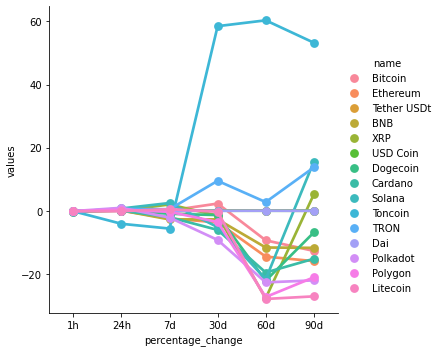

In [30]:
sns.catplot(x='percentage_change',y='values', hue='name',data=df9,kind ='point')